5.3 Tương quan của "Item Purchased/Category" với "Subscription Status"

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Nạp dataset
df = pd.read_csv('shopping_trends.csv')

# Xem qua dữ liệu
df.head(7)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Venmo,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,49,Cash,Quarterly


In [90]:
df['Category'].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [91]:
# Tạo bảng crosstab giữa 'Category' và 'Subscription Status'
category_subscription_crosstab = pd.crosstab(df['Category'], df['Subscription Status'])

# Tính tỷ lệ phần trăm người đăng ký và không đăng ký theo từng Category
category_subscription_percentage = category_subscription_crosstab.div(category_subscription_crosstab.sum(axis=1), axis=0) * 100

# Hiển thị bảng tỷ lệ
print(category_subscription_percentage)


Subscription Status         No        Yes
Category                                 
Accessories          73.064516  26.935484
Clothing             73.690271  26.309729
Footwear             71.452421  28.547579
Outerwear            71.913580  28.086420


In [92]:
# Lọc ra các Category có tỷ lệ người đăng ký cao (> 28%)
high_influence_categories = category_subscription_percentage[category_subscription_percentage['Yes'] > 28]

# Hiển thị các Category này
print(high_influence_categories)


Subscription Status         No        Yes
Category                                 
Footwear             71.452421  28.547579
Outerwear            71.913580  28.086420


Xem sự ảnh hưởng của "Item Purchase" cùng "Category" đến "Subscription Status"
VD: Footwear

In [93]:
# Lọc dữ liệu chỉ với các sản phẩm thuộc nhóm Footwear
footwear_df = df[df['Category'] == 'Footwear']

# Kiểm tra dữ liệu đã lọc
footwear_df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Venmo,Standard,Yes,Yes,14,Venmo,Weekly
10,11,53,Male,Shoes,Footwear,34,Arkansas,L,Purple,Fall,4.1,Yes,Credit Card,Store Pickup,Yes,Yes,26,Bank Transfer,Bi-Weekly
62,63,30,Male,Sneakers,Footwear,21,Mississippi,S,Magenta,Spring,3.8,Yes,Credit Card,Free Shipping,Yes,Yes,31,Credit Card,Fortnightly
64,65,65,Male,Boots,Footwear,83,Alabama,S,Green,Fall,4.8,Yes,PayPal,Standard,Yes,Yes,18,Debit Card,Fortnightly


In [94]:
# Tạo bảng crosstab giữa 'Item Purchased' và 'Subscription Status' cho nhóm Footwear
footwear_subscription_crosstab = pd.crosstab(footwear_df['Item Purchased'], footwear_df['Subscription Status'])

# Tính tỷ lệ phần trăm người đăng ký và không đăng ký theo từng sản phẩm trong nhóm Footwear
footwear_subscription_percentage = footwear_subscription_crosstab.div(footwear_subscription_crosstab.sum(axis=1), axis=0) * 100

# Hiển thị bảng tỷ lệ
print(footwear_subscription_percentage)


Subscription Status         No        Yes
Item Purchased                           
Boots                70.833333  29.166667
Sandals              75.000000  25.000000
Shoes                70.000000  30.000000
Sneakers             69.655172  30.344828


In [95]:
# Lọc những sản phẩm có tỷ lệ người đăng ký cao (> 30%)
high_influence_footwear = footwear_subscription_percentage[footwear_subscription_percentage['Yes'] >= 30]

# Hiển thị các sản phẩm này
print(high_influence_footwear)


Subscription Status         No        Yes
Item Purchased                           
Shoes                70.000000  30.000000
Sneakers             69.655172  30.344828


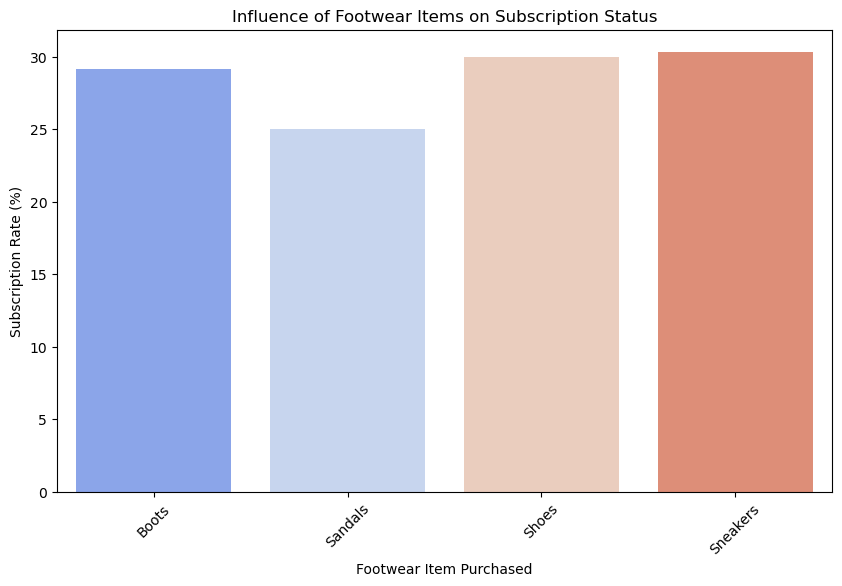

In [96]:

plt.figure(figsize=(10,6))
sns.barplot(x=footwear_subscription_percentage.index, 
            y=footwear_subscription_percentage['Yes'], 
            hue=footwear_subscription_percentage.index, 
            palette='coolwarm', 
            legend=False)

# Thêm tiêu đề và nhãn
plt.title('Influence of Footwear Items on Subscription Status')
plt.xlabel('Footwear Item Purchased')
plt.ylabel('Subscription Rate (%)')
plt.xticks(rotation=45)
plt.show()



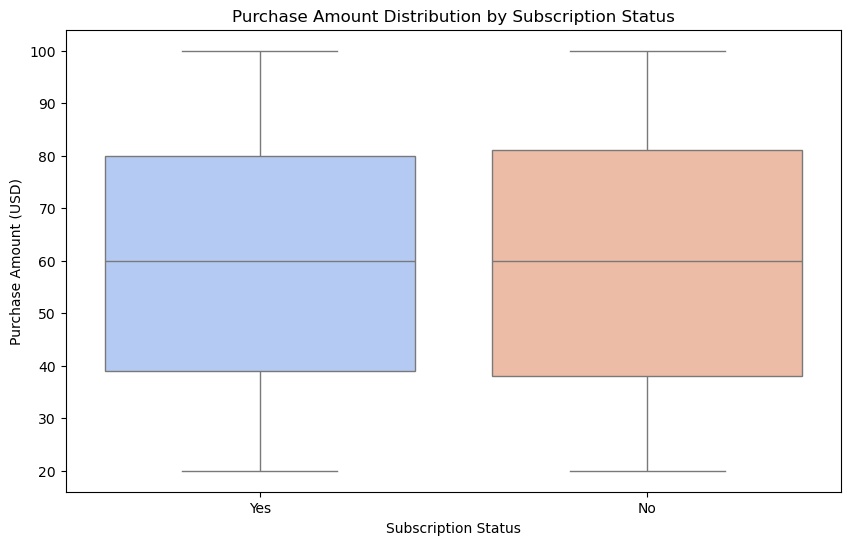

In [97]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Subscription Status', y='Purchase Amount (USD)', 
            data=df, hue='Subscription Status', palette='coolwarm', legend=False)

# Thêm tiêu đề và nhãn
plt.title('Purchase Amount Distribution by Subscription Status')
plt.xlabel('Subscription Status')
plt.ylabel('Purchase Amount (USD)')
plt.show()


-> Không có sự khác biệt rõ rệt, chúng ta có thể suy ra rằng Purchase Amount không có ảnh hưởng đến Subscription Status.

In [98]:
# Tính trung bình và độ lệch chuẩn của Purchase Amount theo Subscription Status
purchase_amount_stats = df.groupby('Subscription Status')['Purchase Amount (USD)'].agg(['mean', 'std'])

# Hiển thị kết quả
print(purchase_amount_stats)


                          mean        std
Subscription Status                      
No                   59.865121  23.775199
Yes                  59.491928  23.449914


-> Giá trị trung bình của Purchase Amount ở nhóm không đăng ký (No) là khoảng 59.87 USD, và ở nhóm đăng ký (Yes) là khoảng 59.49 USD. Sự chênh lệch này rất nhỏ (chỉ khoảng 0.37 USD), nên có thể nói rằng mức chi tiêu trung bình giữa hai nhóm khách hàng không có sự khác biệt đáng kể.
-> Độ lệch chuẩn (standard deviation) cho cả hai nhóm là tương tự nhau (khoảng 23.77 cho nhóm "No" và 23.45 cho nhóm "Yes"), cho thấy sự phân tán của dữ liệu là tương đương giữa hai nhóm.

In [99]:
# Import thư viện để tính hệ số tương quan point-biserial
from scipy.stats import pointbiserialr

# Tính hệ số tương quan point-biserial giữa Purchase Amount và Subscription Status
correlation, p_value = pointbiserialr(df['Purchase Amount (USD)'], df['Subscription Status'].apply(lambda x: 1 if x == 'Yes' else 0))

# Hiển thị kết quả
print(f'Correlation between Purchase Amount and Subscription Status: {correlation}, p-value: {p_value}')


Correlation between Purchase Amount and Subscription Status: -0.006996040561289898, p-value: 0.6622796924526275


-> Hệ số tương quan point-biserial là -0.00699, cho thấy không có mối quan hệ đáng kể giữa Purchase Amount và Subscription Status. Giá trị rất nhỏ gần bằng 0 cho thấy rằng sự chi tiêu của khách hàng không ảnh hưởng đáng kể đến việc họ có đăng ký dịch vụ hay không.

In [100]:
# Import thư viện để thực hiện t-test
from scipy.stats import ttest_ind

# Chia dữ liệu thành hai nhóm
group_yes = df[df['Subscription Status'] == 'Yes']['Purchase Amount (USD)']
group_no = df[df['Subscription Status'] == 'No']['Purchase Amount (USD)']

# Thực hiện t-test
t_stat, p_value = ttest_ind(group_yes, group_no, equal_var=False)

# Hiển thị kết quả
print(f't-statistic: {t_stat}, p-value: {p_value}')


t-statistic: -0.4395786253862316, p-value: 0.660292253988034


Kết quả t-test cho ra t-statistic: -0.44 và p-value: 0.66, cho thấy không có sự khác biệt có ý nghĩa thống kê giữa Purchase Amount của nhóm đăng ký và không đăng ký. Với p-value lớn hơn 0.05, chúng ta không thể bác bỏ giả thuyết rằng hai nhóm có mức chi tiêu tương đương.

5.4 Tương quan Season/Purchase Amount đến "Subscription Status"

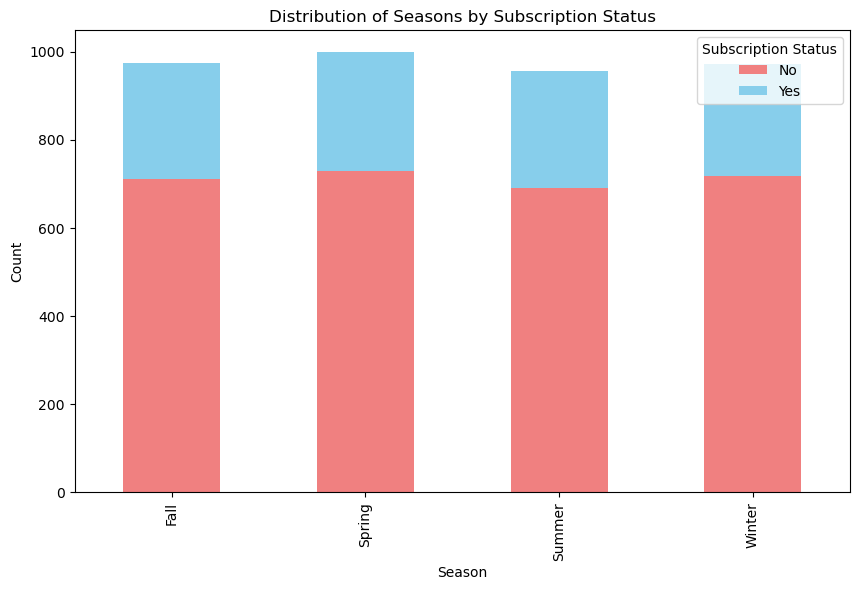

In [101]:
# Tạo bảng phân phối Season theo Subscription Status
season_subscription = df.groupby(['Season', 'Subscription Status']).size().unstack()

# Vẽ biểu đồ cột để so sánh
season_subscription.plot(kind='bar', stacked=True, figsize=(10,6), color=['lightcoral', 'skyblue'])

# Thêm tiêu đề và nhãn
plt.title('Distribution of Seasons by Subscription Status')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Subscription Status')
plt.show()


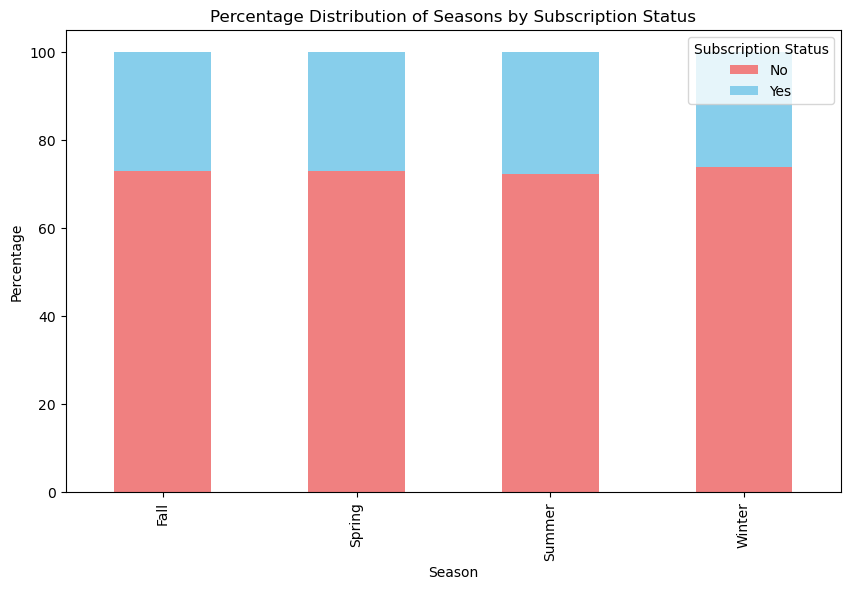

In [102]:
# Tính phần trăm của Season theo Subscription Status
season_subscription_percent = season_subscription.div(season_subscription.sum(axis=1), axis=0) * 100

# Vẽ biểu đồ
season_subscription_percent.plot(kind='bar', stacked=True, figsize=(10,6), color=['lightcoral', 'skyblue'])

# Thêm tiêu đề và nhãn
plt.title('Percentage Distribution of Seasons by Subscription Status')
plt.xlabel('Season')
plt.ylabel('Percentage')
plt.legend(title='Subscription Status')
plt.show()


Subscription Status         No        Yes
Season                                   
Fall                 61.399437  61.981061
Spring               58.750343  58.703704
Summer               59.020290  56.803774
Winter               60.290098  60.547244


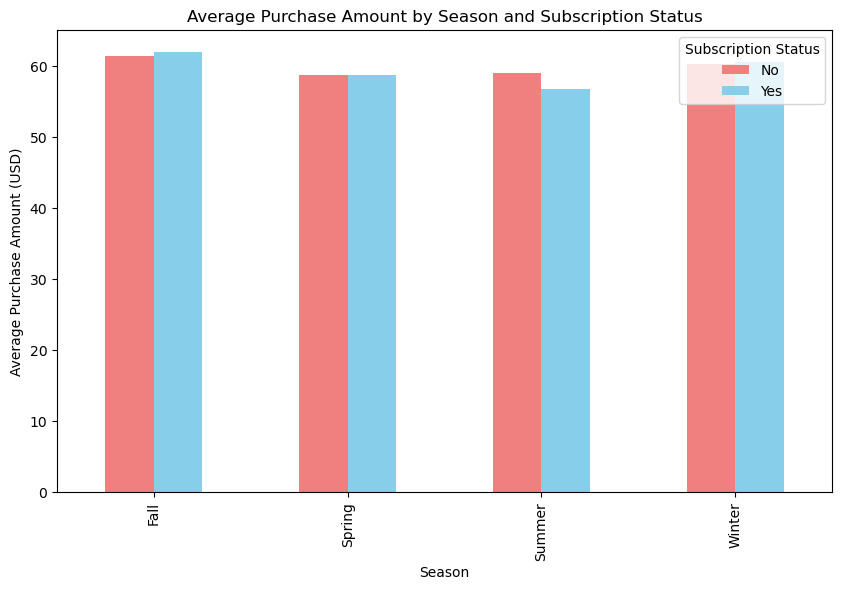

In [103]:
# Tính trung bình Purchase Amount theo Season và Subscription Status
season_purchase_mean = df.groupby(['Season', 'Subscription Status'])['Purchase Amount (USD)'].mean().unstack()

# Hiển thị kết quả
print(season_purchase_mean)

# Vẽ biểu đồ
season_purchase_mean.plot(kind='bar', figsize=(10,6), color=['lightcoral', 'skyblue'])
plt.title('Average Purchase Amount by Season and Subscription Status')
plt.xlabel('Season')
plt.ylabel('Average Purchase Amount (USD)')
plt.legend(title='Subscription Status')
plt.show()


In [104]:
# Import thư viện để thực hiện chi-square test
from scipy.stats import chi2_contingency

# Tạo bảng đếm tần số giữa Season và Subscription Status
season_subscription_table = pd.crosstab(df['Season'], df['Subscription Status'])

# Thực hiện chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(season_subscription_table)

# Hiển thị kết quả
print(f'Chi-square statistic: {chi2_stat}, p-value: {p_value}')


Chi-square statistic: 0.6236617967858865, p-value: 0.8909948193353037


-> p-value lớn hơn 0.05 (ngưỡng ý nghĩa thống kê thường dùng), cụ thể là 0.891, cho thấy rằng không có bằng chứng thống kê để khẳng định rằng có mối liên hệ giữa Season và Subscription Status.
Nói cách khác, các mùa khác nhau không có ảnh hưởng đáng kể đến việc khách hàng có đăng ký dịch vụ hay không.

5.4 Tương quan "Review rating" và "Subscription Status"

In [105]:

# Kiểm tra dữ liệu
print(df[['Review Rating', 'Subscription Status']].head())


   Review Rating Subscription Status
0            3.1                 Yes
1            3.1                 Yes
2            3.1                 Yes
3            3.5                 Yes
4            2.7                 Yes


In [106]:
# Phân tích thống kê
print(df.groupby('Subscription Status')['Review Rating'].describe())


                      count      mean       std  min  25%  50%  75%  max
Subscription Status                                                     
No                   2847.0  3.752722  0.715680  2.5  3.1  3.8  4.4  5.0
Yes                  1053.0  3.742450  0.717974  2.5  3.1  3.7  4.4  5.0


In [107]:
from scipy.stats import ttest_ind

# Tách dữ liệu theo Subscription Status
review_yes = df[df['Subscription Status'] == 'Yes']['Review Rating']
review_no = df[df['Subscription Status'] == 'No']['Review Rating']

# Kiểm định t-test
t_stat, p_value = ttest_ind(review_yes, review_no)
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: -0.39759093978742127, P-value: 0.6909535107423552


-> Kết quả của kiểm định t-test với T-statistic = -0.40 và P-value = 0.69 cho thấy:

T-statistic có giá trị âm, điều này chỉ ra rằng trung bình của Review Rating cho những người có Subscription Status = 'Yes' có xu hướng thấp hơn một chút so với những người có Subscription Status = 'No'. Tuy nhiên, giá trị T-statistic này khá nhỏ, cho thấy sự khác biệt giữa hai nhóm không đáng kể.

P-value = 0.69, lớn hơn 0.05, nghĩa là chúng ta không có đủ bằng chứng để kết luận rằng có sự khác biệt có ý nghĩa thống kê giữa hai nhóm Subscription Status về mặt Review Rating.

In [108]:
# Chia Review Rating thành 3 nhóm
df['Review Group'] = pd.cut(df['Review Rating'], bins=[2.5, 3.33, 4.17, 5], 
                            labels=['Low (2.5 - 3.33)', 'Medium (3.33 - 4.17)', 'High (4.17 - 5)'])

# Kiểm tra kết quả
print(df[['Review Rating', 'Review Group']].head())


   Review Rating          Review Group
0            3.1      Low (2.5 - 3.33)
1            3.1      Low (2.5 - 3.33)
2            3.1      Low (2.5 - 3.33)
3            3.5  Medium (3.33 - 4.17)
4            2.7      Low (2.5 - 3.33)


In [109]:


# Tính tần suất Subscription Status theo nhóm Review Group
review_group_status = df.groupby(['Review Group', 'Subscription Status'], observed=True).size().unstack()

# Hiển thị kết quả
print(review_group_status)



Subscription Status    No  Yes
Review Group                  
Low (2.5 - 3.33)      898  344
Medium (3.33 - 4.17)  944  333
High (4.17 - 5)       958  357


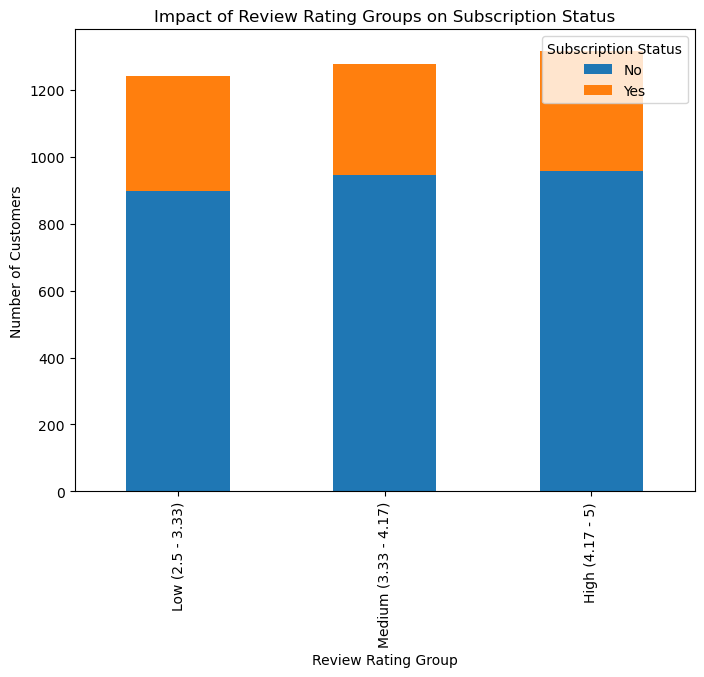

In [110]:
# Vẽ biểu đồ cột
review_group_status.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Impact of Review Rating Groups on Subscription Status')
plt.xlabel('Review Rating Group')
plt.ylabel('Number of Customers')
plt.show()


In [111]:
# Tính tỷ lệ phần trăm
review_group_status_percent = review_group_status.div(review_group_status.sum(axis=1), axis=0) * 100

# Hiển thị kết quả
print(review_group_status_percent)


Subscription Status          No        Yes
Review Group                              
Low (2.5 - 3.33)      72.302738  27.697262
Medium (3.33 - 4.17)  73.923258  26.076742
High (4.17 - 5)       72.851711  27.148289


5.5 Tương quan của " Payment method và Prefered Payment Method" đến "Subscription Status"

In [112]:
# Kiểm tra dữ liệu
print(df[['Payment Method', 'Preferred Payment Method', 'Subscription Status']].head())


  Payment Method Preferred Payment Method Subscription Status
0    Credit Card                    Venmo                 Yes
1  Bank Transfer                     Cash                 Yes
2           Cash              Credit Card                 Yes
3         PayPal                   PayPal                 Yes
4           Cash                   PayPal                 Yes


In [113]:
# Tạo cột để kiểm tra xem Payment Method có trùng với Preferred Payment Method không
df['Payment Match'] = df['Payment Method'] == df['Preferred Payment Method']

# Kiểm tra kết quả
print(df[['Payment Method', 'Preferred Payment Method', 'Payment Match']].head())


  Payment Method Preferred Payment Method  Payment Match
0    Credit Card                    Venmo          False
1  Bank Transfer                     Cash          False
2           Cash              Credit Card          False
3         PayPal                   PayPal           True
4           Cash                   PayPal          False


In [114]:
# Tính tần suất Subscription Status dựa trên Payment Match
match_status = df.groupby(['Payment Match', 'Subscription Status']).size().unstack()

# Hiển thị kết quả
print(match_status)


Subscription Status    No  Yes
Payment Match                 
False                2405  878
True                  442  175


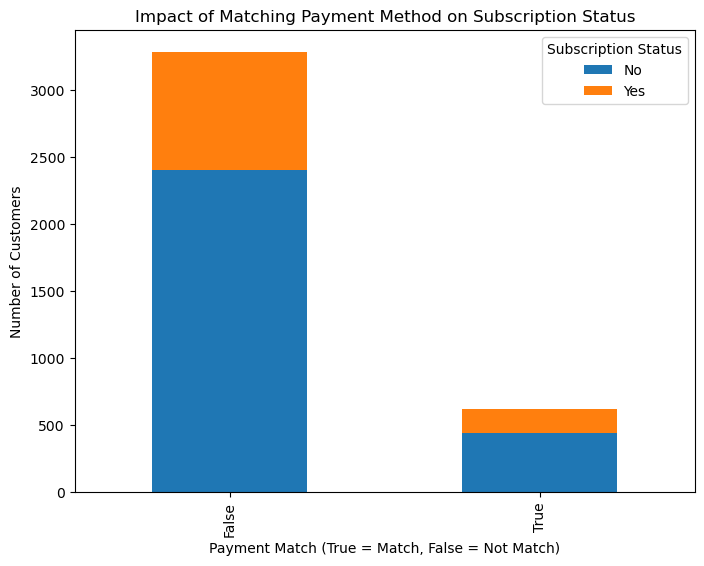

In [115]:
# Vẽ biểu đồ cột cho Payment Match
match_status.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Impact of Matching Payment Method on Subscription Status')
plt.xlabel('Payment Match (True = Match, False = Not Match)')
plt.ylabel('Number of Customers')
plt.show()


In [116]:
# Tính tỷ lệ phần trăm cho Payment Match
match_status_percent = match_status.div(match_status.sum(axis=1), axis=0) * 100

# Hiển thị kết quả
print(match_status_percent)


Subscription Status         No        Yes
Payment Match                            
False                73.256168  26.743832
True                 71.636953  28.363047


-> Tỷ lệ khách hàng đăng ký (Subscription Status = 'Yes') cao hơn một chút khi Payment Method trùng với Preferred Payment Method (28.36% so với 26.74%).
Tuy nhiên, sự khác biệt này không quá lớn, chỉ khoảng 1.6%.
->Mặc dù có sự khác biệt nhỏ, việc khách hàng chọn cùng một phương thức thanh toán cho cả Payment Method và Preferred Payment Method chỉ ảnh hưởng nhẹ đến khả năng họ đăng ký. Điều này cho thấy rằng sự trùng khớp giữa hai phương thức này có thể là một yếu tố, nhưng không phải là yếu tố quyết định mạnh mẽ đến việc khách hàng có đăng ký hay không. 

5.5 Tương quan của "Shipping type" và "Subscription Status" 

In [117]:
# Kiểm tra các giá trị của Shipping Type và Subscription Status
print(df[['Shipping Type', 'Subscription Status']].head())


   Shipping Type Subscription Status
0        Express                 Yes
1        Express                 Yes
2  Free Shipping                 Yes
3   Next Day Air                 Yes
4  Free Shipping                 Yes


In [118]:
# Tính tần suất Shipping Type theo Subscription Status
shipping_status = df.groupby(['Shipping Type', 'Subscription Status']).size().unstack()

# Hiển thị kết quả
print(shipping_status)


Subscription Status   No  Yes
Shipping Type                
2-Day Shipping       474  153
Express              456  190
Free Shipping        498  177
Next Day Air         480  168
Standard             479  175
Store Pickup         460  190


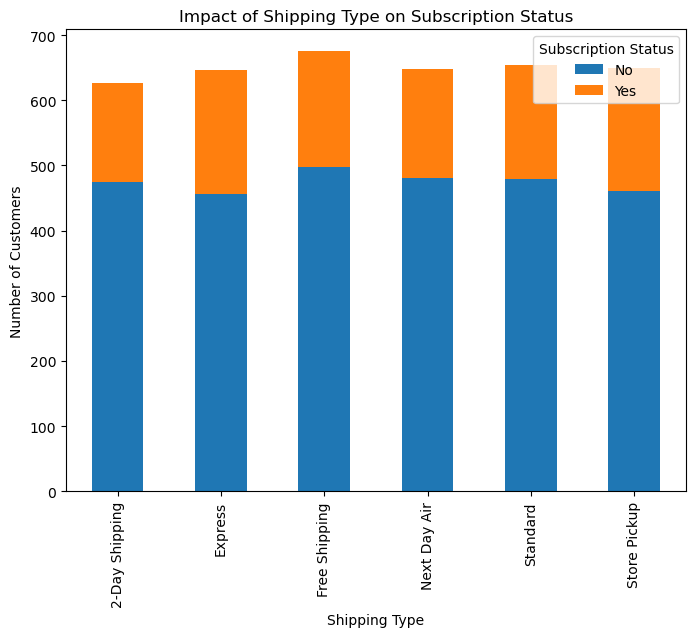

In [119]:
# Vẽ biểu đồ cột cho Shipping Type
shipping_status.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Impact of Shipping Type on Subscription Status')
plt.xlabel('Shipping Type')
plt.ylabel('Number of Customers')
plt.show()


In [120]:
# Tính tỷ lệ phần trăm cho Shipping Type
shipping_status_percent = shipping_status.div(shipping_status.sum(axis=1), axis=0) * 100

# Hiển thị kết quả
print(shipping_status_percent)


Subscription Status         No        Yes
Shipping Type                            
2-Day Shipping       75.598086  24.401914
Express              70.588235  29.411765
Free Shipping        73.777778  26.222222
Next Day Air         74.074074  25.925926
Standard             73.241590  26.758410
Store Pickup         70.769231  29.230769


-> Các phương thức vận chuyển như Express và Store Pickup có tỷ lệ khách hàng đăng ký cao hơn (gần 29%).
Ngược lại, 2-Day Shipping có tỷ lệ khách hàng đăng ký thấp nhất (24.40%), cho thấy phương thức này ít ảnh hưởng tích cực đến việc đăng ký.
Free Shipping, Standard, và Next Day Air có tỷ lệ khách hàng đăng ký ở mức trung bình, từ 25.93% đến 26.76%, không có sự khác biệt lớn.
-> Express Shipping và Store Pickup dường như có ảnh hưởng tích cực đến tỷ lệ đăng ký cao hơn so với các phương thức vận chuyển khác. Những khách hàng chọn hai phương thức này có khả năng đăng ký cao hơn khoảng 3-5% so với các phương thức khác.
2-Day Shipping có tỷ lệ đăng ký thấp hơn, cho thấy có thể phương thức này không được khách hàng ưa chuộng khi quyết định đăng ký.
-> Đề xuất tối ưu hóa các phương thức vận chuyển như Express hoặc Store Pickup để tăng tỷ lệ đăng ký

5.6 Tương quan của "Discount Applied", "Promo code Used" đến" Subcription Status" 

In [121]:
# Kiểm tra dữ liệu của Discount Applied, Promo Code Used và Subscription Status
print(df[['Discount Applied', 'Promo Code Used', 'Subscription Status']].head())


  Discount Applied Promo Code Used Subscription Status
0              Yes             Yes                 Yes
1              Yes             Yes                 Yes
2              Yes             Yes                 Yes
3              Yes             Yes                 Yes
4              Yes             Yes                 Yes


In [122]:
# Tính tần suất Subscription Status theo Discount Applied
discount_status = df.groupby(['Discount Applied', 'Subscription Status']).size().unstack()

# Hiển thị kết quả
print(discount_status)


Subscription Status      No     Yes
Discount Applied                   
No                   2223.0     NaN
Yes                   624.0  1053.0


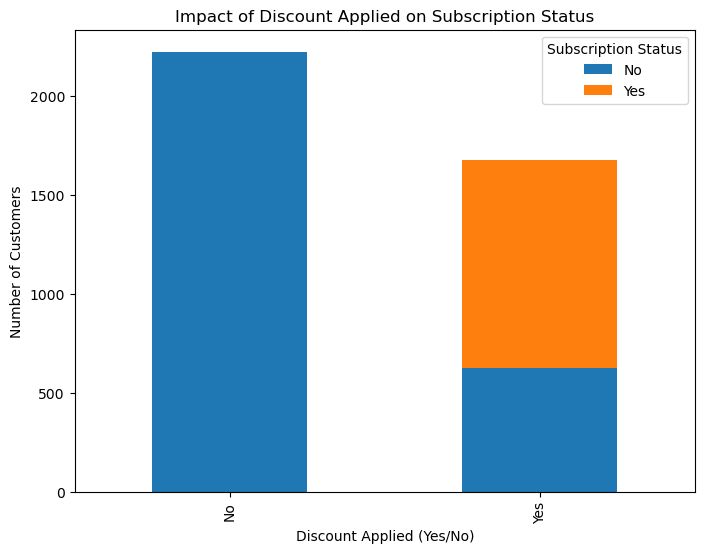

In [123]:
# Vẽ biểu đồ cột cho Discount Applied
discount_status.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Impact of Discount Applied on Subscription Status')
plt.xlabel('Discount Applied (Yes/No)')
plt.ylabel('Number of Customers')
plt.show()


In [124]:
# Tính tỷ lệ phần trăm cho Discount Applied
discount_status_percent = discount_status.div(discount_status.sum(axis=1), axis=0) * 100

# Hiển thị kết quả
print(discount_status_percent)


Subscription Status          No        Yes
Discount Applied                          
No                   100.000000        NaN
Yes                   37.209302  62.790698


In [125]:
# Tính tần suất Subscription Status theo Promo Code Used
promo_status = df.groupby(['Promo Code Used', 'Subscription Status']).size().unstack()

# Hiển thị kết quả
print(promo_status)


Subscription Status      No     Yes
Promo Code Used                    
No                   2223.0     NaN
Yes                   624.0  1053.0


-> Tác động mạnh mẽ của giảm giá: Kết quả cho thấy rằng việc áp dụng giảm giá làm tăng khả năng đăng ký lên đến 62.79%, cho thấy khách hàng rất nhạy cảm với ưu đãi giảm giá.

Không có ưu đãi = Không có đăng ký: Tình trạng không có giảm giá dẫn đến tỷ lệ đăng ký bằng 0, điều này cho thấy rằng khách hàng có thể không thấy đủ động lực để đăng ký khi không có ưu đãi.

Kết luận:
Giảm giá là một yếu tố quan trọng và hiệu quả trong việc thu hút khách hàng đăng ký.
Chiến lược sử dụng ưu đãi giảm giá trong các chương trình khuyến mãi có thể tạo ra động lực lớn cho khách hàng.
Đề xuất:
Dựa trên phân tích trên, đây là một số đề xuất:

Tăng cường các chương trình giảm giá và đưa ra các chiến dịch marketing để thông báo cho khách hàng về các ưu đãi này.
Theo dõi phản hồi của khách hàng và điều chỉnh các ưu đãi để tối ưu hóa tỷ lệ đăng ký.
Kết hợp giảm giá với các yếu tố khác như dịch vụ khách hàng tốt hơn hoặc sản phẩm chất lượng cao để tăng cường sự hấp dẫn cho khách hàng.
Các chiến lược này có thể giúp nâng cao tỷ lệ chuyển đổi và tạo động lực cho khách hàng trong việc đăng ký dịch vụ.

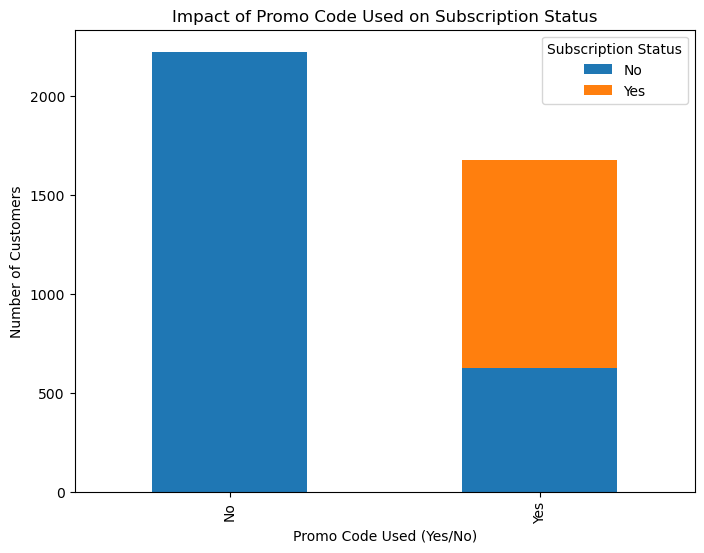

In [126]:
# Vẽ biểu đồ cột cho Promo Code Used
promo_status.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Impact of Promo Code Used on Subscription Status')
plt.xlabel('Promo Code Used (Yes/No)')
plt.ylabel('Number of Customers')
plt.show()


In [127]:
# Tính tỷ lệ phần trăm cho Promo Code Used
promo_status_percent = promo_status.div(promo_status.sum(axis=1), axis=0) * 100

# Hiển thị kết quả
print(promo_status_percent)


Subscription Status          No        Yes
Promo Code Used                           
No                   100.000000        NaN
Yes                   37.209302  62.790698


-> Kết quả giống nhau 100% cho 2 yếu tố " Discount Applied" và "Promo Code Used" ảnh hưởng đến" Subscription Status" 

-> Cả Discount Applied và Promo Code Used đều có tác động lớn đến khả năng đăng ký của khách hàng, điều này cho thấy rằng việc áp dụng các chiến lược ưu đãi sẽ là một yếu tố quan trọng trong việc tăng cường tỷ lệ chuyển đổi và tạo động lực cho khách hàng đăng ký.

5.7 "Previous Purchases" và "Frequence" đến "Subcription Status"

In [128]:
df['Previous Purchases'].unique()

array([14,  2, 23, 49, 31, 19,  8,  4, 26, 10, 37, 34, 44, 36, 17, 46, 50,
       22, 32, 40, 16, 13,  7, 41, 45, 38, 48, 18, 15, 25, 39, 35, 29, 21,
       43,  3,  5, 24, 42, 47, 28, 20, 33,  1,  9, 12, 27, 11, 30,  6],
      dtype=int64)

In [129]:
df['Frequency of Purchases'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

In [130]:
# Tạo các nhóm cho Previous Purchases
bins_previous = [0, 10, 20, 30, 40, float('inf')]
labels_previous = ['1-10 Purchases', '11-20 Purchases', '21-30 Purchases', '31-40 Purchases', '41+ Purchases']
df['Previous Purchases Group'] = pd.cut(df['Previous Purchases'], bins=bins_previous, labels=labels_previous)


In [131]:
# Nhóm Frequency of Purchases
frequency_bins = {
    'Rarely': ['Annually', 'Every 3 Months'],
    'Occasionally': ['Quarterly', 'Bi-Weekly', 'Monthly'],
    'Frequently': ['Fortnightly', 'Weekly']
}

def categorize_frequency(frequency):
    for group, values in frequency_bins.items():
        if frequency in values:
            return group
    return 'Unknown'

df['Frequency Group'] = df['Frequency of Purchases'].apply(categorize_frequency)


In [132]:
# Tính toán tỷ lệ phần trăm cho từng nhóm
result_combined = df.groupby(['Previous Purchases Group', 'Frequency Group', 'Subscription Status']).size().unstack(fill_value=0)
result_combined_percentage = result_combined.div(result_combined.sum(axis=1), axis=0) * 100

print(result_combined_percentage)


Subscription Status                              No        Yes
Previous Purchases Group Frequency Group                      
1-10 Purchases           Frequently       76.605505  23.394495
                         Occasionally     75.776398  24.223602
                         Rarely           77.459016  22.540984
11-20 Purchases          Frequently       71.144279  28.855721
                         Occasionally     75.692308  24.307692
                         Rarely           71.713147  28.286853
21-30 Purchases          Frequently       69.266055  30.733945
                         Occasionally     73.255814  26.744186
                         Rarely           71.929825  28.070175
31-40 Purchases          Frequently       68.240343  31.759657
                         Occasionally     72.023810  27.976190
                         Rarely           70.697674  29.302326
41+ Purchases            Frequently       71.563981  28.436019
                         Occasionally     74.404762  25

C:\Users\HP\AppData\Local\Temp\ipykernel_5364\2388259243.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_combined = df.groupby(['Previous Purchases Group', 'Frequency Group', 'Subscription Status']).size().unstack(fill_value=0)


-> Nhóm 1-10 Purchases:

Tần suất mua hàng:
Frequently: 23.39% đăng ký
Occasionally: 24.22% đăng ký
Rarely: 22.54% đăng ký
Nhận xét: Nhóm này có tỷ lệ đăng ký không cao, nhưng nhóm mua hàng Occasionally có tỷ lệ đăng ký cao nhất trong nhóm này.

-> Nhóm 11-20 Purchases:

Tần suất mua hàng:
Frequently: 28.86% đăng ký
Occasionally: 24.31% đăng ký
Rarely: 28.29% đăng ký
Nhận xét: Nhóm này có sự gia tăng đáng kể về tỷ lệ đăng ký ở cả hai nhóm Frequently và Rarely. Điều này cho thấy rằng những khách hàng đã có từ 11 đến 20 lần mua hàng có xu hướng đăng ký nhiều hơn.

-> Nhóm 21-30 Purchases:

Tần suất mua hàng:
Frequently: 30.73% đăng ký
Occasionally: 26.74% đăng ký
Rarely: 28.07% đăng ký
Nhận xét: Đây là nhóm có tỷ lệ đăng ký cao nhất cho nhóm Frequently so với các nhóm trước đó.

-> Nhóm 31-40 Purchases:

Tần suất mua hàng:
Frequently: 31.76% đăng ký
Occasionally: 27.98% đăng ký
Rarely: 29.30% đăng ký
Nhận xét: Tỷ lệ đăng ký tiếp tục tăng, đặc biệt ở nhóm Frequently.

-> Nhóm 41+ Purchases:

Tần suất mua hàng:
Frequently: 28.44% đăng ký
Occasionally: 25.60% đăng ký
Rarely: 27.98% đăng ký
Nhận xét: Tỷ lệ đăng ký ở nhóm này thấp hơn so với nhóm trước, nhưng vẫn duy trì mức độ cao hơn 25%.

===> Tổng quát: Sự gia tăng trong số lần mua hàng trước đó dường như có mối liên hệ tích cực với tỷ lệ đăng ký. Các khách hàng đã thực hiện nhiều giao dịch hơn có xu hướng đăng ký cao hơn, đặc biệt là trong các nhóm tần suất mua hàng thường xuyên.
Tần suất Mua hàng: Khách hàng có tần suất mua hàng Frequently có tỷ lệ đăng ký cao hơn so với các nhóm Occasionally và Rarely. Điều này cho thấy rằng các khách hàng thường xuyên quay lại có nhiều khả năng đăng ký hơn.